In [28]:
import torch
from PIL import Image
import numpy as np
import pandas as pd
import torch
import os
import sys
from torch.utils import data
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.manifold import TSNE


sys.path.append('../')

from utils import utils, model_fetch, dataloader
metrics_dict = {}

np.random.seed(0)

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# Loading both test sets - CIFAR and CIFAR - 10H -- Images are same.

_CLASSES = ['plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# CIFAR Data
file_path = '../data/data-cifar-10/cifar-10-batches-py/test_batch'
label_dict = unpickle(file_path)

# Labels for the data
labels = label_dict[b'labels'] 
label_names = [_CLASSES[i] for i in labels]

In [30]:
# Features from which model

model = 'augmented_teacher'

features_path = '../../results/embeddings/'+ model +'.npy'
features = np.load(features_path)

In [31]:
# Class Segregation
segregate = True

if segregate:
    # Currently Cat, Deer, Ship
    interest_classes = [3,2,1,9]

    seg_feats = []
    seg_labels = []
    for i in range(len(features)):
        if labels[i] in interest_classes:
            seg_feats.append(features[i])
            seg_labels.append(labels[i])

    seg_labels = [_CLASSES[i] for i in seg_labels]
    
    seg_feats = np.array(seg_feats)
    seg_labels = np.array(seg_labels)
    
    features = seg_feats
    label_names = seg_labels

In [32]:
tsne = TSNE()
reduced = tsne.fit_transform(features)
reduced_transformed = reduced - np.min(reduced, axis=0)
reduced_transformed /= np.max(reduced_transformed, axis=0)


dat = pd.DataFrame(reduced_transformed, columns=["x", "y"])
dat["labels"] = label_names

Text(0.5, 1.0, 'Embedding Space Visualization - TestSet for baseline_teacher')

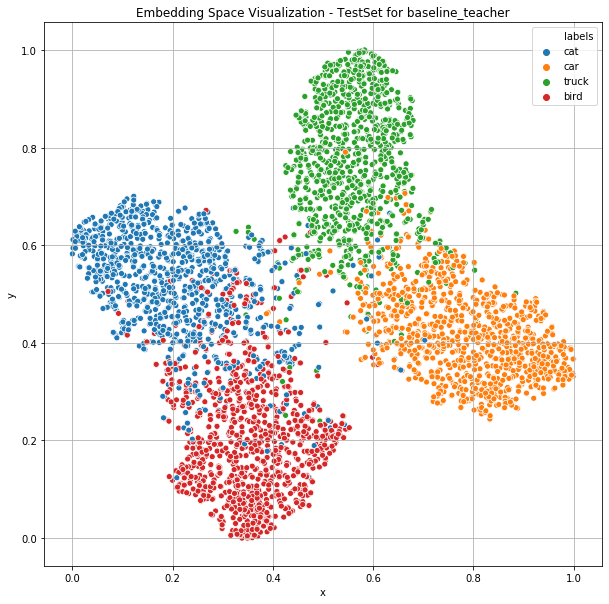

In [19]:
plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="x", y="y",
                     hue="labels",
                     data=dat,
               )
plt.grid(True)
plt.title("Embedding Space Visualization - TestSet for {}".format(model))

Text(0.5, 1.0, 'Embedding Space Visualization - TestSet for mixup_teacher')

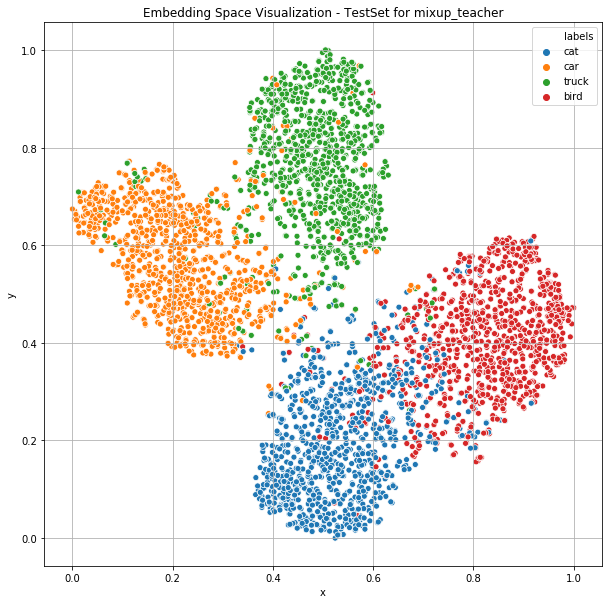

In [15]:
plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="x", y="y",
                     hue="labels",
                     data=dat,
               )
plt.grid(True)
plt.title("Embedding Space Visualization - TestSet for {}".format(model))

Text(0.5, 1.0, 'Embedding Space Visualization - TestSet for cutmix_teacher')

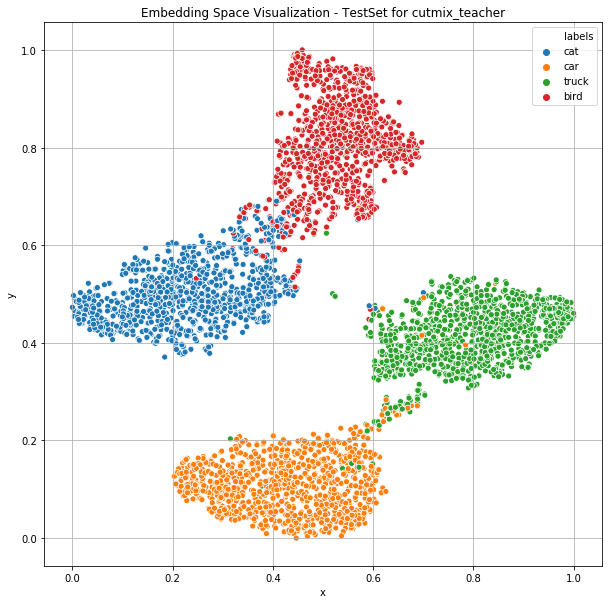

In [23]:
plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="x", y="y",
                     hue="labels",
                     data=dat,
               )
plt.grid(True)
plt.title("Embedding Space Visualization - TestSet for {}".format(model))

Text(0.5, 1.0, 'Embedding Space Visualization - TestSet for cutout_teacher')

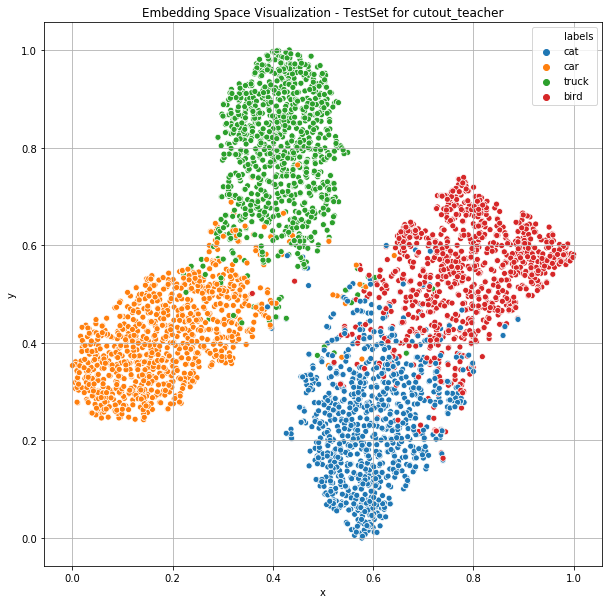

In [27]:
plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="x", y="y",
                     hue="labels",
                     data=dat,
               )
plt.grid(True)
plt.title("Embedding Space Visualization - TestSet for {}".format(model))

Text(0.5, 1.0, 'Embedding Space Visualization - TestSet for augmented_teacher')

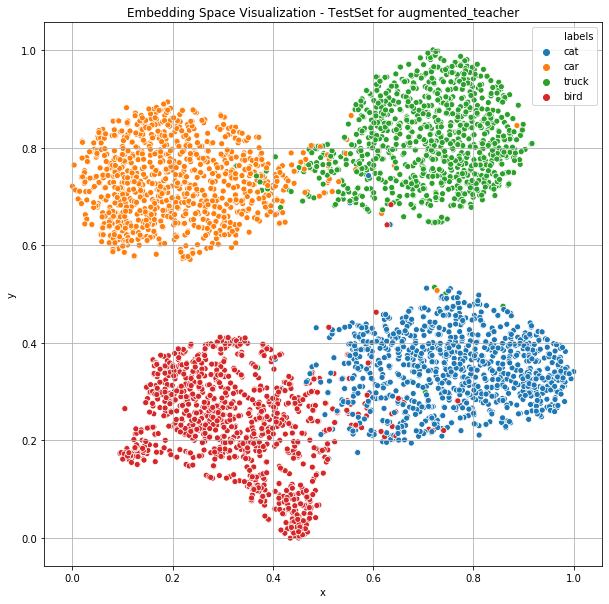

In [33]:
plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="x", y="y",
                     hue="labels",
                     data=dat,
               )
plt.grid(True)
plt.title("Embedding Space Visualization - TestSet for {}".format(model))